In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

PIB PER CAPITA

In [17]:
df_pib = pd.read_excel('wb_pib_per_capita_paises.xls')

In [18]:
df_pib = df_pib.rename(columns={
    'Country Name': 'País'
})

In [19]:
anos = [str(i) for i in itertools.chain(range(2003, 2006), range(2008, 2025, 2))]
df_pib = df_pib.melt(
    id_vars='País',
    value_vars=anos,
    var_name='Ano',
    value_name='PIB',
)

In [20]:
df_pib['Ano'] = df_pib['Ano'].astype(int)

In [21]:
paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda",
    "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas",
    "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei Darussalam",
    "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon",
    "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo (Republic of the)", "Costa Rica", "Côte d'Ivoire", "Croatia", "Cuba",
    "Cyprus", "Czechia", "Democratic People's Republic of Korea", "Democratic Republic of the Congo",
    "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt",
    "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia",
    "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana",
    "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti",
    "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland",
    "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati",
    "Kuwait", "Kyrgyzstan", "Lao People's Democratic Republic", "Latvia", "Lebanon",
    "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg",
    "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands",
    "Mauritania", "Mauritius", "Mexico", "Micronesia (Federated States of)", "Monaco",
    "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru",
    "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay",
    "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Republic of Korea",
    "Republic of Moldova", "Romania", "Russian Federation", "Rwanda", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino",
    "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles",
    "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden",
    "Switzerland", "Syrian Arab Republic", "Tajikistan", "Tanzania", "Thailand",
    "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey",
    "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu",
    "Venezuela (Bolivarian Republic of)", "Viet Nam", "Yemen", "Zambia", "Zimbabwe"
]

In [22]:
df_pib = df_pib[df_pib['País'].isin(paises)].reset_index(drop=True)

ÍNDICE DE DEMOCRACIA ELEITORAL

In [23]:
df_indice_demo = pd.read_csv('electoral-democracy-index.csv')

In [24]:
df_indice_demo = df_indice_demo.rename(columns={
    'Entity': 'País',
    'Year': 'Ano',
    'Electoral democracy index (central estimate)': 'Índice de Democracia'
})

In [25]:
df_indice_demo = df_indice_demo.drop(columns={
    'Code'
})

In [26]:
anos = itertools.chain(range(2003, 2006), range(2008, 2025, 2))
df_indice_demo = df_indice_demo[df_indice_demo['Ano'].isin(anos)].reset_index(drop=True)

MERGE

In [27]:
df = pd.merge(df_indice_demo, df_pib)

In [28]:
df = df.iloc[:, [2,3]]

CORRELAÇÃO

In [29]:
corr = df.corr(method='pearson')

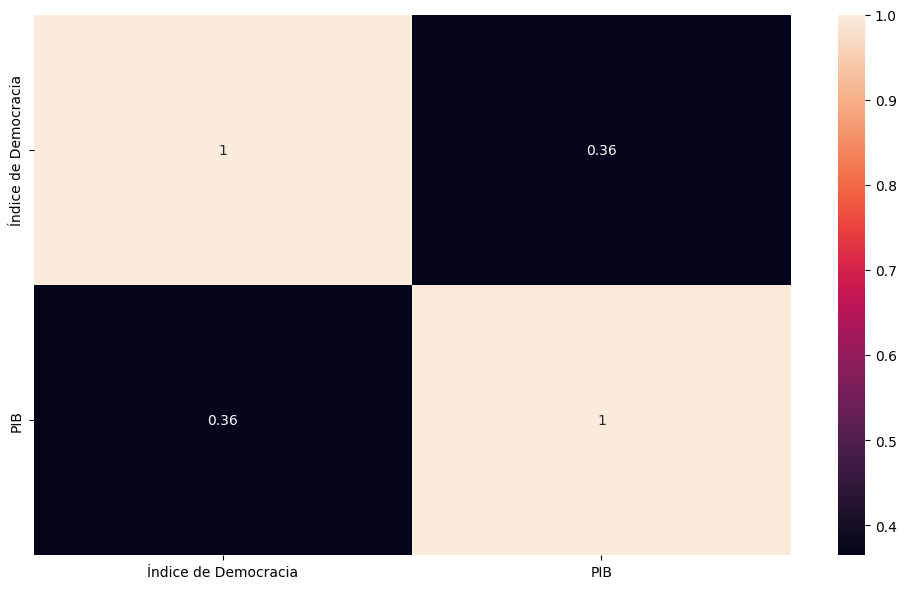

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(corr, annot=True)

fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/correlacao4.png')
plt.tight_layout()
plt.show()